# House Sales Prediction

## 1. Importing Packages

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Understanding

In [3]:
# read the data
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking shape of dataset
housing.shape

(1460, 81)

In [5]:
#checking info of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


## 3. Data Cleaning or Data Preparation

### 3.1 : Reading Data Dictionary and Filling Missing Values

In [8]:
#reading data dictionary

f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

<b>Let us Recheck Again on Missing Values</b>

In [10]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


We do not have any more null values

### 3.2 : EDA (Exploratory Data Analysis)

<b>3.2.1 : Sales Price</b>

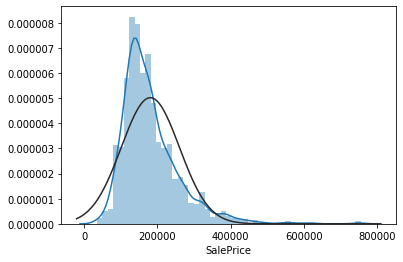

In [11]:
# Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing['SalePrice'], fit=norm)
plt.show()

The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

<b>3.2.2 : MSSubClass</b>

In [12]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [13]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

"ID" column is like row number, it has all unique values and can be ignored for analysis.

<b>3.2.3 : Pair Plots on Continous Variables</b>

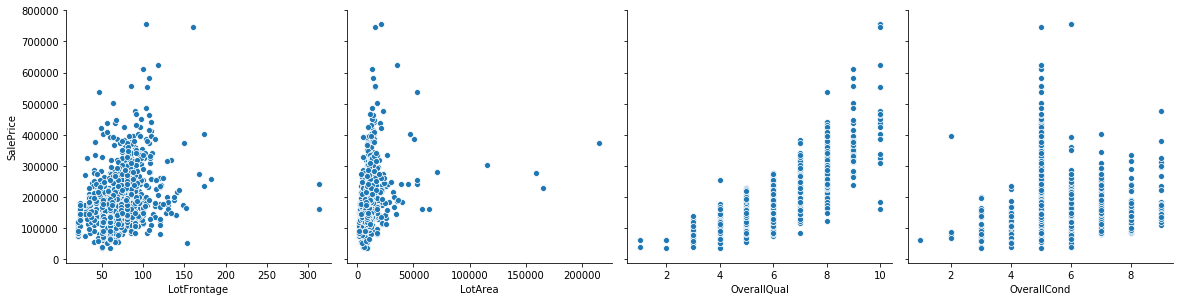

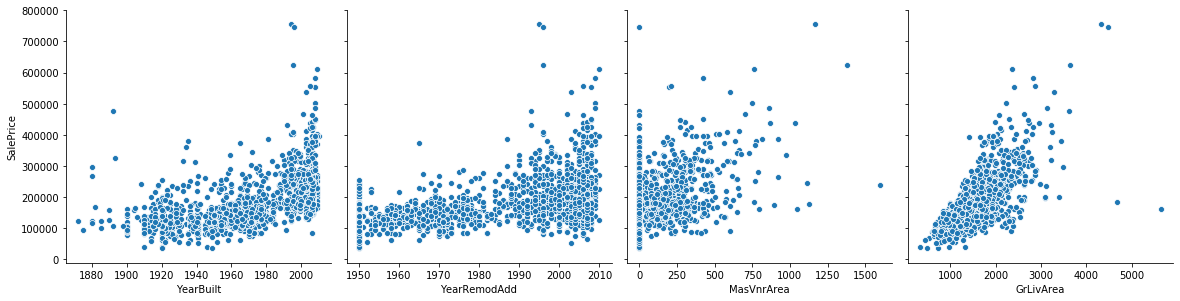

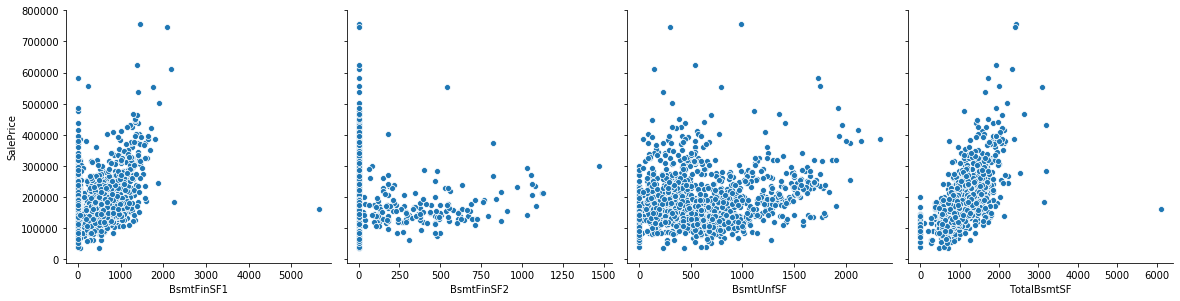

In [14]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('LotFrontage', 'LotArea', 'OverallQual','OverallCond')
pp('YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

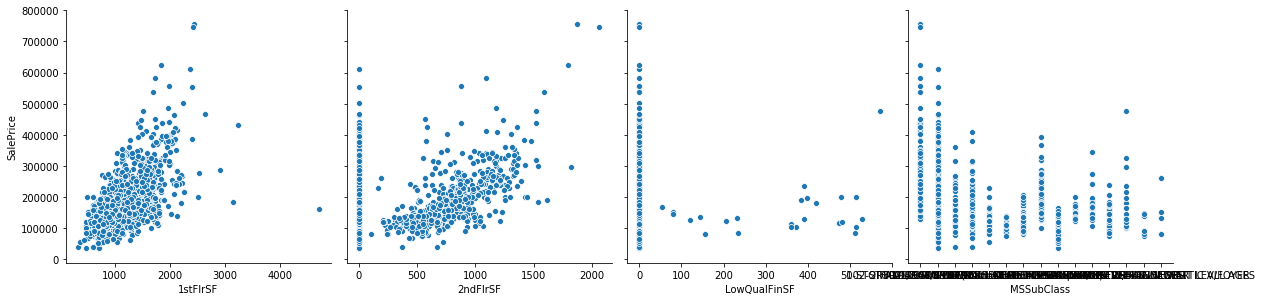

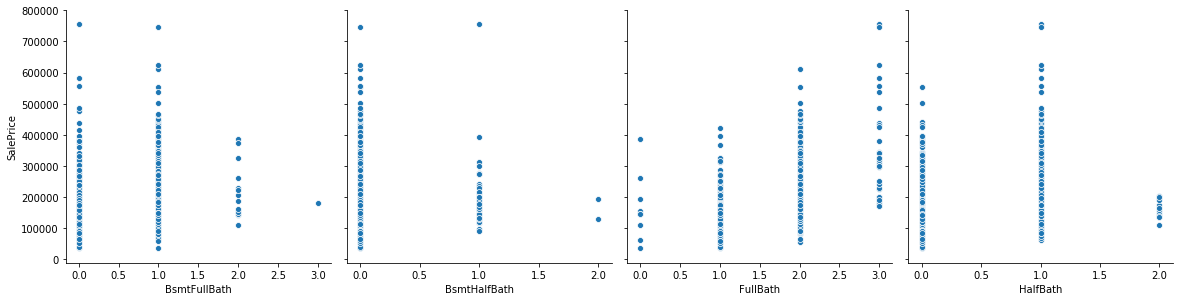

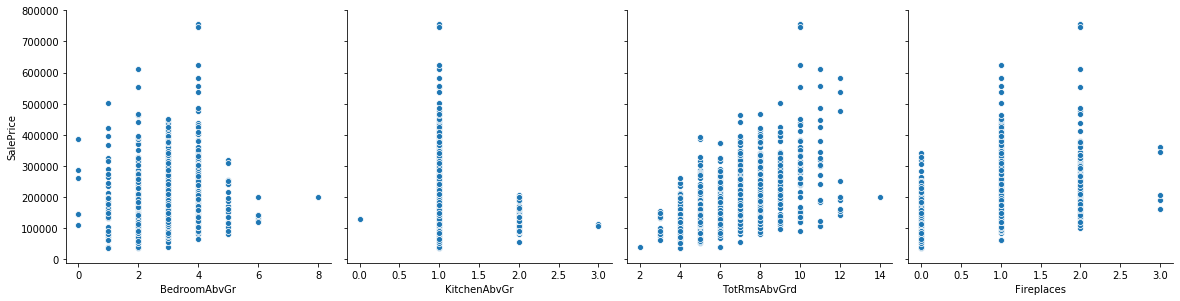

In [15]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')

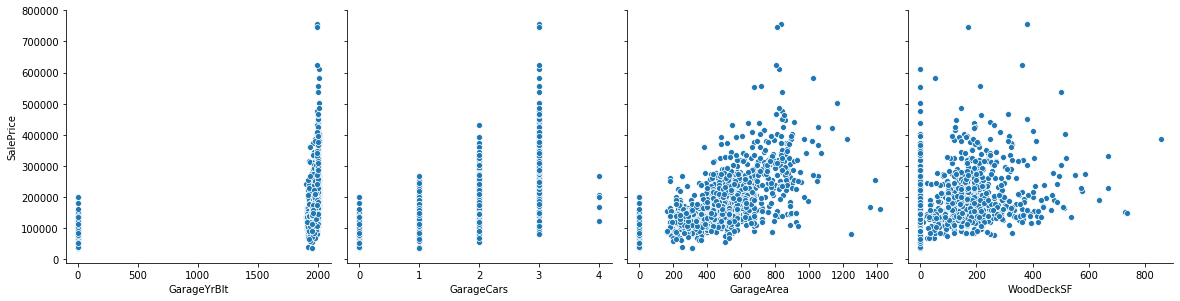

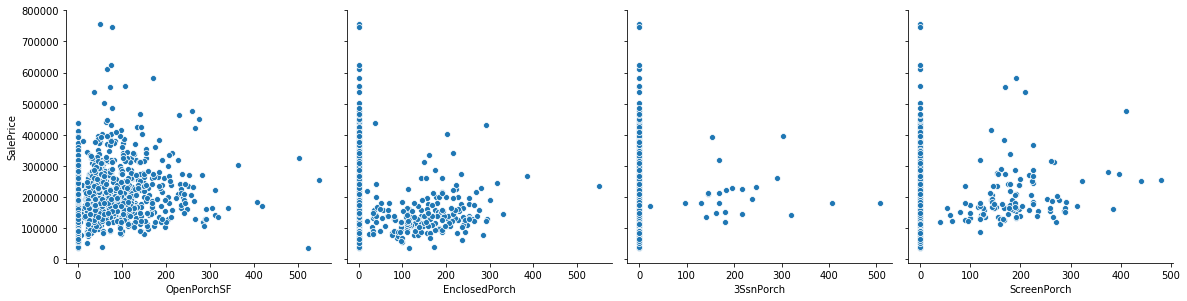

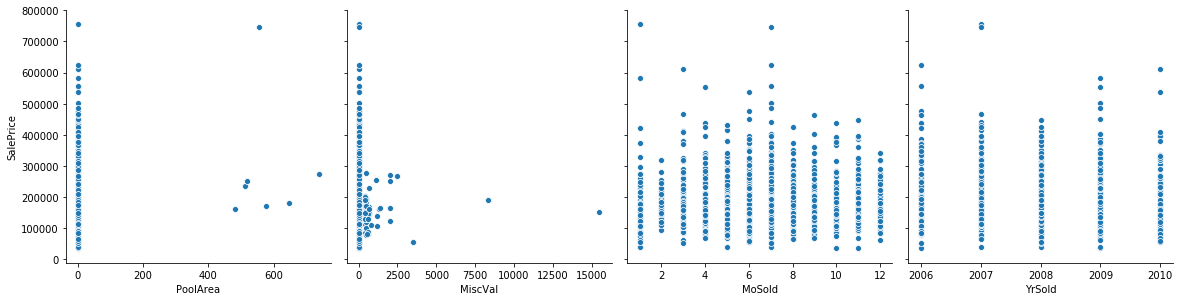

In [16]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch')
pp('PoolArea','MiscVal', 'MoSold', 'YrSold')

<b>3.2.4 : Label Encoding for Categorical Variables</b>

In [17]:
# label encode ordinal features where there is order in categories

housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)

### 3.3 : Bi-Variate or Multivariate Analysis

In [18]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(12, 10))   
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(housing[var1], palette=("husl"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3=sns.countplot(housing[var2], palette=("husl"))
    plt3.set(xlabel = '%s'%var2, ylabel='Count of'+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,4)
    plt.title(var2+' vs Price')
    plt4=sns.boxplot(x=housing[var2], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
        
    plt.show()

In [19]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

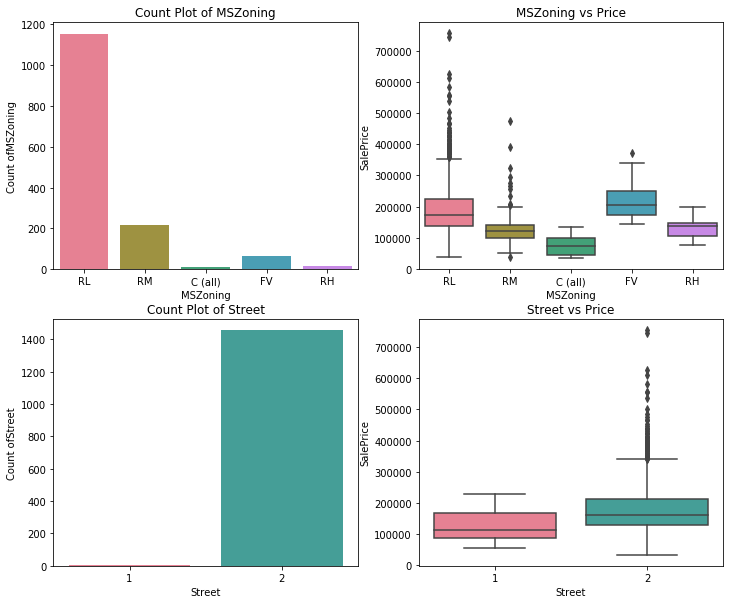

In [20]:
plot_charts('MSZoning', 'Street', label_rotation=False)

**Observation:** 
- MsZoning identifies the general zoning classification of the sale. 
- We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.
- Street identifies the Type of road access to property
- While we see that houses with Paved roads have higher Sale Price compared to Gravel, we must also note that this is a highly imbalanced variable with most records as "Pave"

In [21]:
housing['Street'].value_counts(dropna=False)

2    1454
1       6
Name: Street, dtype: int64

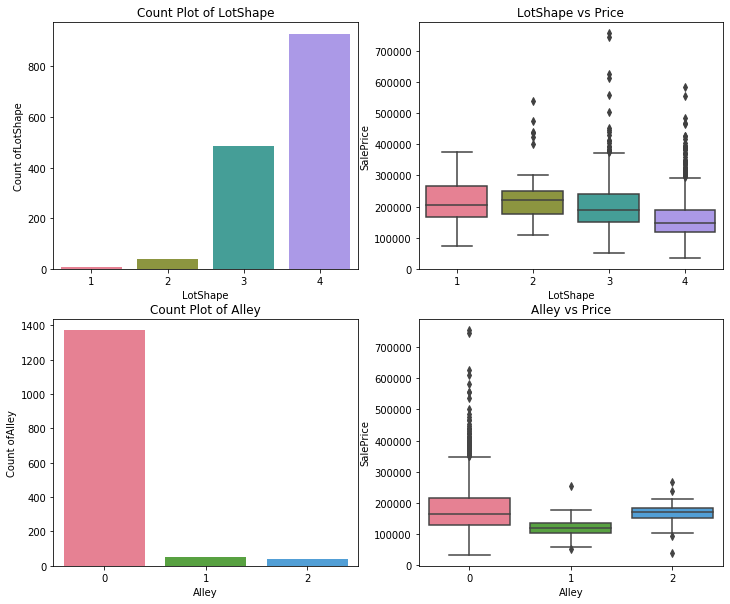

In [22]:
plot_charts('LotShape','Alley',label_rotation=False)

In [23]:
housing['Street'].value_counts(dropna=False)

2    1454
1       6
Name: Street, dtype: int64

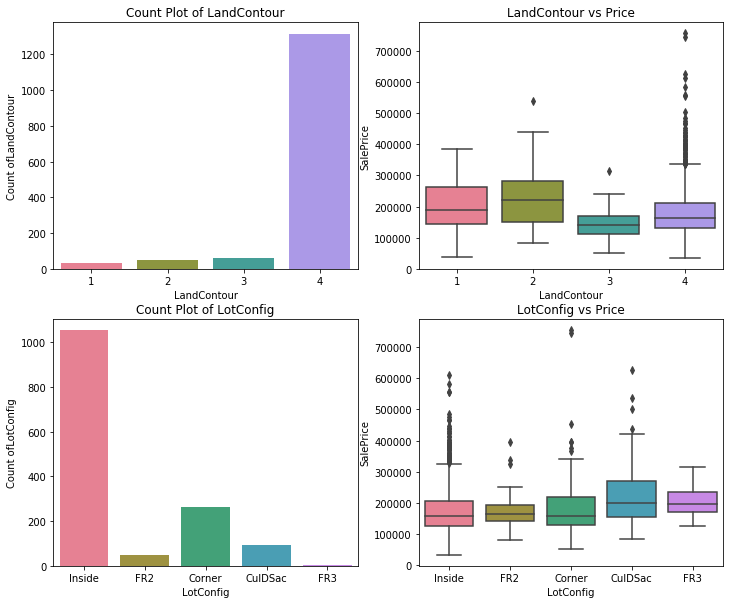

In [24]:
plot_charts('LandContour','LotConfig',label_rotation=False)

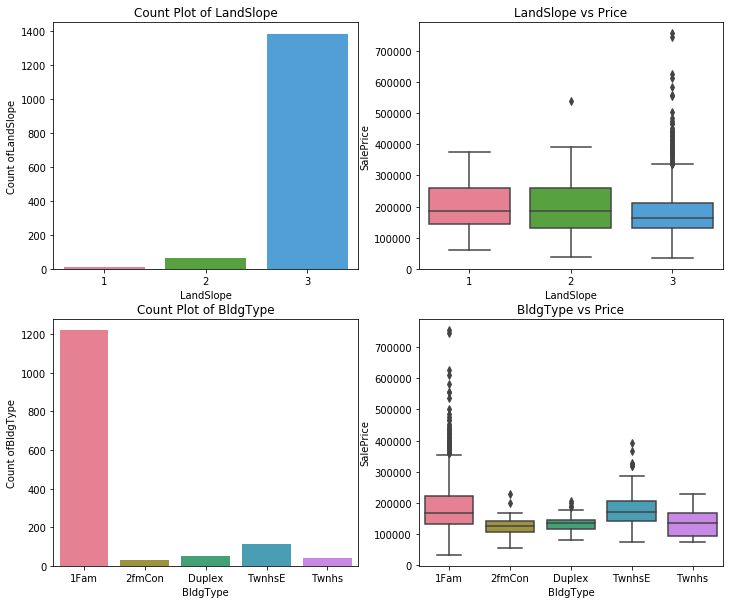

In [25]:
plot_charts('LandSlope','BldgType',label_rotation=False)

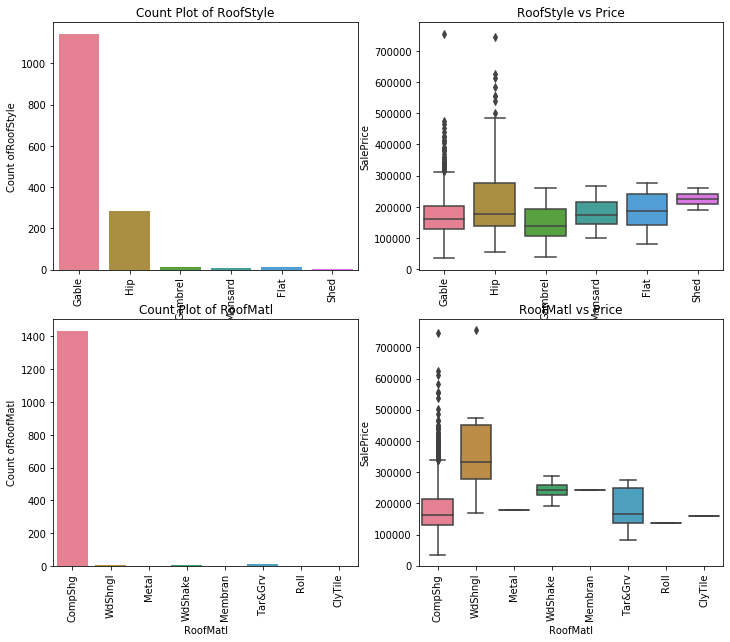

In [26]:
plot_charts('RoofStyle', 'RoofMatl',label_rotation=True)

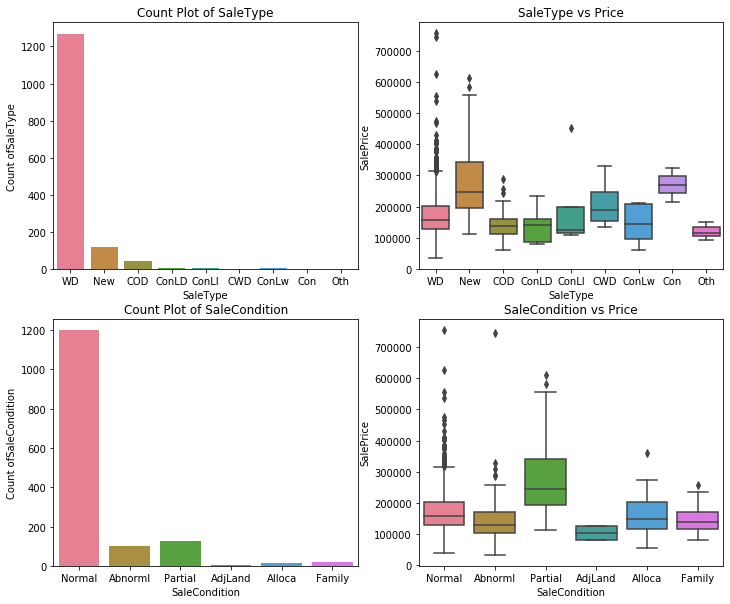

In [27]:
plot_charts('SaleType', 'SaleCondition',label_rotation=False)

<b>3.3 : Observations</b>

- from above plots, we can prepare our data, remove outliers, derive new variables

### 3.4 : Data Preparation

- Changing Data types
- Making Derived Variables for more insights
- Treating Outliers
- Observing Correlations after the above changes
- Dropping non relevant Variables
- Creating Dummies
- Slicing the Dataset into training and testing
- Normalizing the Data

<b>3.4.1 : Changing Datatypes</b>

In [28]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [29]:
#changing data type of Gararge yr built to int from float
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

<b>3.4.2 : Deriving New Variable which make more sense</b>

In [30]:
#DERIVED VARIABLES which might make more sense than year

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [31]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'SalePrice',
       'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

<b>3.4.3 : Treating Outliers</b>

In [32]:
#OUTLIER TREATMENT

def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [33]:
numeric_data_list=list(numeric_data.columns)

In [34]:
housing=remove_outliers(housing,numeric_data_list)

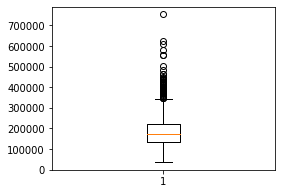

In [35]:
# Outlier treatment on the variable Sale Price
plt.figure(figsize=(4,3))
plt.boxplot(housing['SalePrice'])
plt.show()

In [36]:
housing.shape

(1158, 80)

<b>3.4.4 : Correlation Matrix and Insights</b>

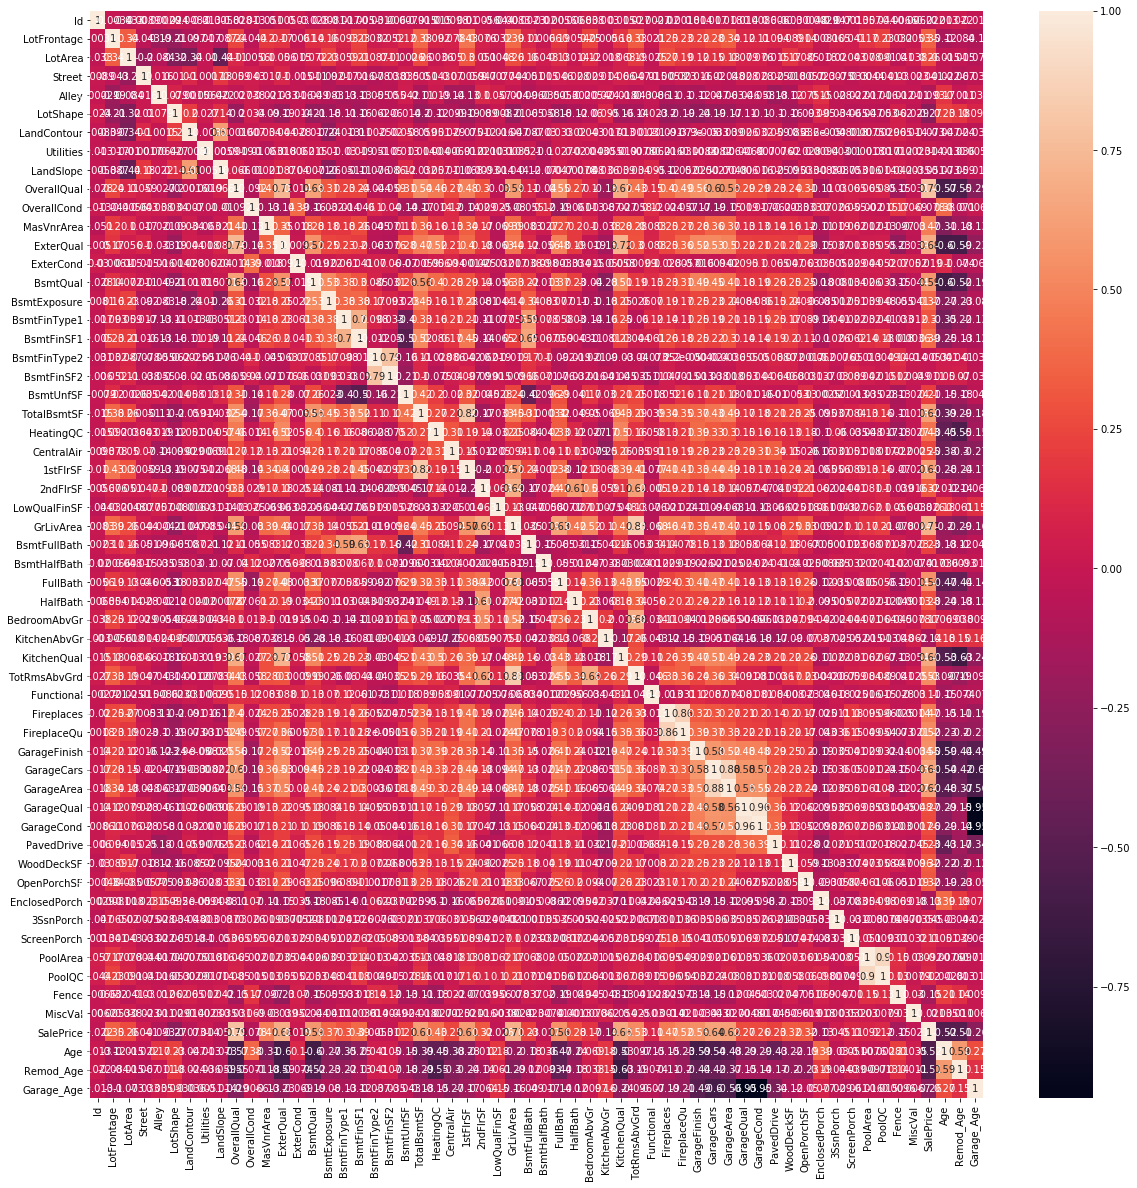

In [37]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))

sns.heatmap(cor, annot=True)
plt.show()

<b>Clearly this is very crowded, so lets take a different view at correlation</b>

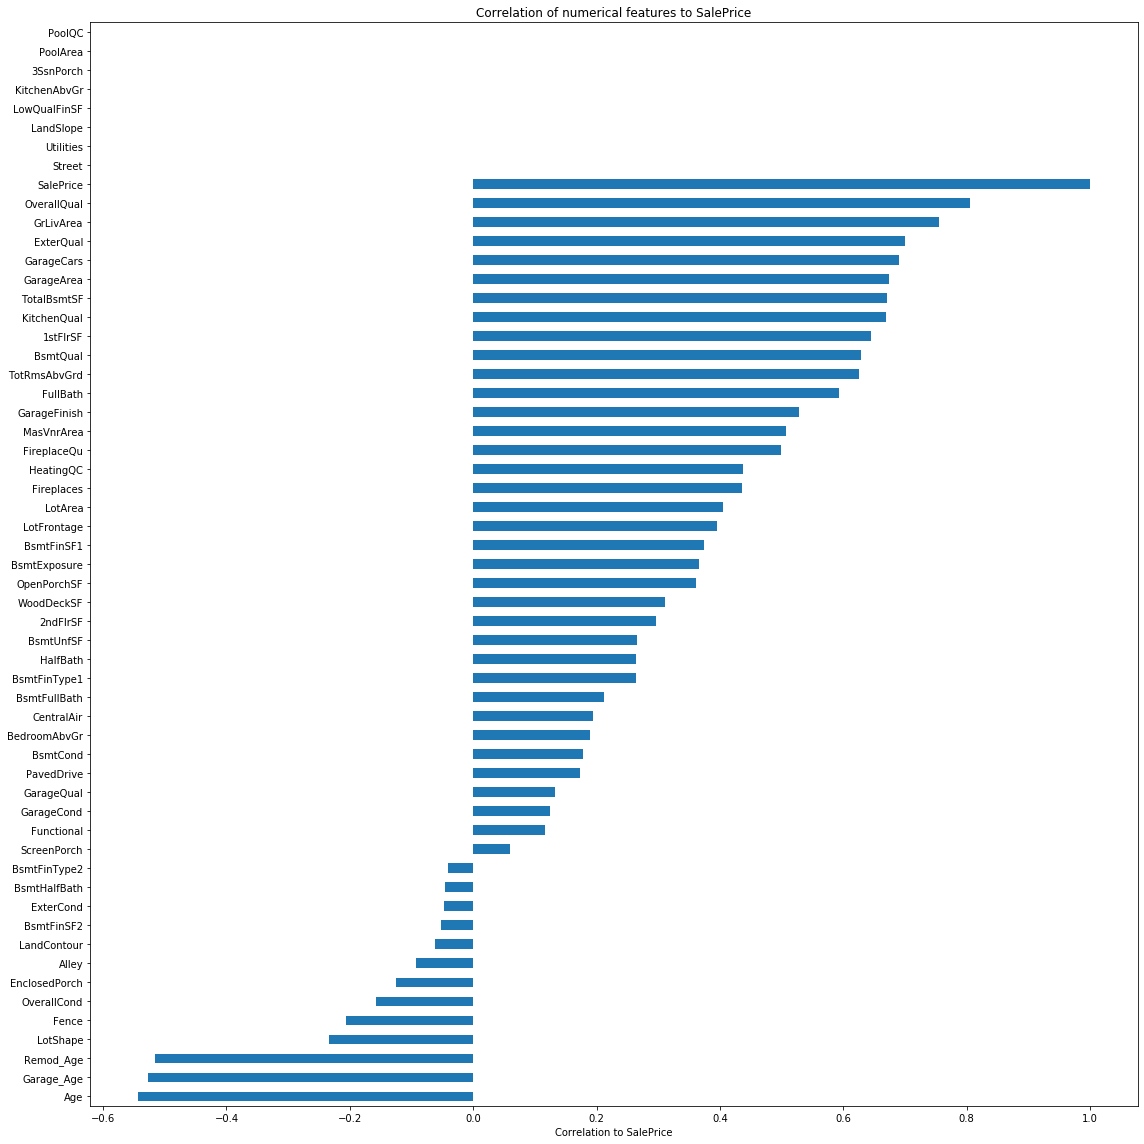

In [38]:
# we drop Id (not relevant)
corr = housing.drop(["Id"], axis=1).select_dtypes(include="number").corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

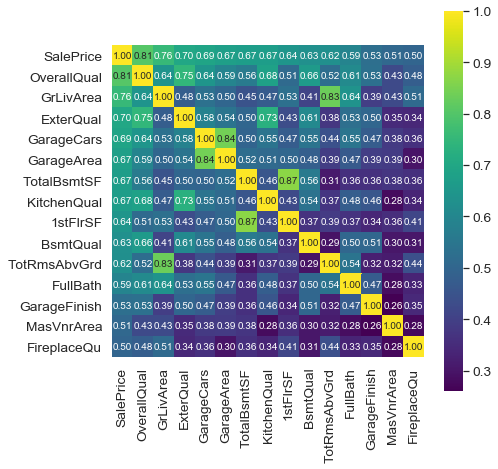

In [39]:
#saleprice correlation matrix
plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<b>3.4.5 : Create Dummy Variables</b>

In [40]:
#converting binary variables to numeric by mapping to 0 and 1

housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [41]:
#converting binary variables to numeric by mapping to 0 and 1

housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [42]:
df = housing.drop(['Id'],axis=1)
housing_categorical = df.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,February
1,1-STORY 1946 & NEWER ALL STYLES,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,May
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,September
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml,February
4,2-STORY 1946 & NEWER,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,December


In [43]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
#dropping original categorical columns
df = df.drop(list(housing_categorical.columns), axis=1)

In [45]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,housing_dummies], axis=1)

In [46]:
df.shape

(1158, 208)

<b>3.4.6 : Slicing Data into Train and Test sets</b>

In [47]:
#train_test_split
df_train,df_test=train_test_split(df,train_size=0.70, random_state=100)
df_train.shape

(810, 208)

In [48]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

<b> As Dependant Variable (Sales) is Positively Skewed, We will take the logarithmic on Sales to reduce the effect of Outliers </b>

In [49]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns

In [50]:
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

<b>3.4.7 : Normalizing the created splits</b>

In [51]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

## 4. Data Modelling

### 4.1 : Linear Regression with 20 Variables from RFE

In [52]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['Condition2_Norm', 'Condition2_PosA', 'Condition2_RRNn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stucco',
       'Heating_Grav', 'Heating_Wall'],
      dtype='object')

In [53]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     13.44
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.93e-38
Time:                        02:46:19   Log-Likelihood:                -206.62
No. Observations:                 810   AIC:                             455.2
Df Residuals:                     789   BIC:                             553.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8730      0.200     59.417      0.000      11.481      12.265
Condition2_Norm        -0.3011      0.191     -1.577      0.115      -0.676       0.074
Condition2_PosA         0.5483      0.371      1.478      0.140      -0.180       1.276
Condition2_RRNn        -0.7636      0.296     -2.583      0.010      -1.344      -0.183
Exterior1st_BrkComm    -0.5698      0.334     -1.705      0.089      -1.226       0.086
Exterior1st_BrkFace     0.5367      0.126      4.253      0.000       0.289       0.784
Exterior1st_CemntBd    -0.2871      0.379     -0.757      0.449      -1.032       0.457
Exterior1st_HdBoard     0.4004      0.111      3.596      0.000       0.182       0.619
Exterior1st_ImStucc     0.9042      0.334      2.706      0.007       0.248       1.560
Exterior1st_MetalSd     0.3259      0.112      2.920      0.004       0.107       0.545
Exterior1st_Plywood     0.4500      0.116      3.888      0.000       0.223       0.677
Exterior1st_Stone       0.9953      0.334      2.978      0.003       0.339       1.651
Exterior1st_Stucco      0.4246      0.201      2.109      0.035       0.029       0.820
Exterior1st_VinylSd     0.6609      0.109      6.063      0.000       0.447       0.875
Exterior1st_Wd Sdng     0.2702      0.112      2.412      0.016       0.050       0.490
Exterior1st_WdShing     0.2741      0.137      1.995      0.046       0.004       0.544
Exterior2nd_CmentBd     0.8474      0.359      2.359      0.019       0.142       1.553
Exterior2nd_Other       0.4402      0.317      1.389      0.165      -0.182       1.062
Exterior2nd_Stucco     -0.2296      0.171     -1.343      0.180      -0.565       0.106
Heating_Grav           -0.3733      0.225     -1.661      0.097      -0.815       0.068
Heating_Wall           -0.3533      0.328     -1.078      0.281      -0.997       0.290
==============================================================================
Omnibus:                       29.565   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.499
Skew:                           0.310   Prob(JB):                     1.32e-10
Kurtosis:                       3.981   Cond. No.                         72.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Clearly we can see that top 20 variables from the RFE Method, did not give good accuracy
- This Clearly shows that the model needs many Features to predict the sales therefore prediction becomes complex
- This is a main reason we need regularization as more features might easily overfit the model

### 4.2 : Ridge Regression with different alpha values

In [54]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-0.07819867917006817


<b>The Best alpha for Ridge Regression came out to be: 8</b>

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016555,1.821138e-02,0.002593,1.196837e-03,0.0001,{'alpha': 0.0001},-0.083082,-0.084671,-0.082638,-0.086941,...,-0.082924,0.003196,26,-0.056341,-0.053264,-0.050548,-0.054868,-0.052142,-0.053433,0.002026
1,0.006184,3.993751e-04,0.001994,5.352484e-07,0.001,{'alpha': 0.001},-0.082932,-0.084566,-0.082580,-0.086951,...,-0.082861,0.003190,25,-0.056354,-0.053282,-0.050557,-0.054872,-0.052173,-0.053448,0.002024
2,0.005985,1.261578e-03,0.001196,3.985647e-04,0.01,{'alpha': 0.01},-0.081780,-0.083794,-0.082097,-0.087048,...,-0.082419,0.003138,24,-0.056467,-0.053433,-0.050644,-0.054920,-0.052401,-0.053573,0.002008
3,0.005188,9.794529e-04,0.001594,4.875878e-04,0.05,{'alpha': 0.05},-0.079795,-0.082146,-0.081071,-0.087485,...,-0.081625,0.003294,23,-0.056796,-0.053981,-0.050976,-0.055150,-0.052973,-0.053975,0.001966
4,0.003990,5.352484e-07,0.000997,6.503192e-07,0.1,{'alpha': 0.1},-0.079014,-0.081054,-0.080554,-0.087861,...,-0.081256,0.003497,21,-0.057102,-0.054591,-0.051369,-0.055403,-0.053561,-0.054405,0.001910
5,0.006782,3.989460e-04,0.001795,3.988984e-04,0.2,{'alpha': 0.2},-0.078673,-0.079781,-0.079938,-0.088333,...,-0.080972,0.003741,20,-0.057580,-0.055486,-0.051936,-0.055848,-0.054485,-0.055067,0.001857
6,0.023138,2.180834e-02,0.002194,3.994232e-04,0.3,{'alpha': 0.3},-0.078470,-0.079020,-0.079531,-0.088651,...,-0.080753,0.003979,19,-0.058003,-0.056141,-0.052470,-0.056242,-0.055270,-0.055625,0.001810
7,0.008181,7.481375e-04,0.002191,3.997985e-04,0.4,{'alpha': 0.4},-0.078241,-0.078923,-0.079300,-0.088848,...,-0.080640,0.004134,18,-0.058470,-0.056651,-0.052946,-0.056554,-0.056047,-0.056134,0.001793
8,0.007582,1.353454e-03,0.002000,7.076816e-06,0.5,{'alpha': 0.5},-0.078073,-0.078849,-0.079165,-0.088972,...,-0.080529,0.004258,17,-0.058891,-0.057071,-0.053346,-0.056815,-0.056712,-0.056567,0.001795
9,0.006185,1.322948e-03,0.001195,3.992654e-04,0.6,{'alpha': 0.6},-0.077998,-0.078783,-0.079079,-0.089044,...,-0.080432,0.004353,16,-0.059247,-0.057423,-0.053683,-0.057044,-0.057291,-0.056938,0.001805


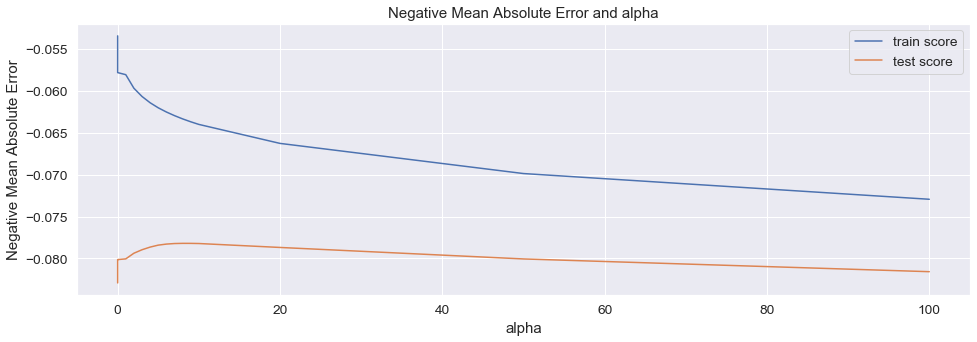

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [58]:
#final ridge model
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01033937,  0.01004568,  0.        ,  0.00787314, -0.00501434,
        0.00067087,  0.        ,  0.        ,  0.0650565 ,  0.04043957,
        0.00836833,  0.00089176, -0.01037245,  0.00806487, -0.00439341,
        0.00864137,  0.01245947,  0.02222125, -0.0002218 ,  0.00457272,
       -0.00013969,  0.02519491,  0.01234339,  0.        ,  0.02944526,
        0.02162968,  0.        ,  0.04180111,  0.01149375,  0.0052065 ,
        0.01866131,  0.0156442 ,  0.00797635,  0.        ,  0.01206227,
        0.02306573,  0.01099467,  0.01588998, -0.00013288,  0.0050096 ,
        0.01553161,  0.02426716,  0.0160765 , -0.00984519,  0.        ,
        0.01368314,  0.0087424 ,  0.00639734,  0.        ,  0.01468854,
        0.        ,  0.        , -0.00070039,  0.        , -0.05737238,
       -0.01071459,  0.00755174,  0.02099438, -0.02228475,  0.01205215,
       -0.00094133,  0.00926006, -0.00776888,  0.00784633,  0.02740038,
        0.01233058, -0.0435429 , -0.01118907, -0.01230564,  0.02

#### Training, Testing Accuracy Metrics with Best Ridge Regression Model

In [59]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9299166434068226


In [60]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143609272434796


In [61]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.014407180012094439


In [62]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
ridge_coeffs = sorted(list(zip(cols, model_parameters_1)),key=lambda x: abs(x[1]), reverse=True)
ridge_coeffs

[('constant', 11.882),
 ('Neighborhood_StoneBr', 0.109),
 ('Condition2_PosN', -0.107),
 ('Neighborhood_Edwards', -0.092),
 ('Neighborhood_Crawfor', 0.079),
 ('Condition2_Norm', 0.073),
 ('OverallQual', 0.065),
 ('Exterior1st_BrkFace', 0.065),
 ('Neighborhood_NridgHt', 0.061),
 ('Age', -0.057),
 ('MSZoning_FV', 0.056),
 ('Neighborhood_IDOTRR', -0.054),
 ('SaleCondition_Normal', 0.053),
 ('Condition1_Norm', 0.045),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', -0.044),
 ('Exterior1st_BrkComm', -0.043),
 ('GrLivArea', 0.042),
 ('Neighborhood_ClearCr', 0.041),
 ('OverallCond', 0.04),
 ('Neighborhood_MeadowV', -0.04),
 ('SaleCondition_Partial', 0.038),
 ('Neighborhood_BrkSide', 0.035),
 ('Exterior2nd_Wd Sdng', 0.035),
 ('Neighborhood_SawyerW', -0.034),
 ('BldgType_Twnhs', -0.034),
 ('GarageType_Basment', 0.034),
 ('Neighborhood_Veenker', 0.033),
 ('MSZoning_RL', 0.032),
 ('LotConfig_FR2', -0.031),
 ('MonthSold_October', -0.031),
 ('Neighborhood_Gilbert', -0.03),
 ('Exterior1st_MetalSd', 0.03),

### 4.3 : Lasso Regression with different alpha values

In [63]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [65]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07820491263760766


<b>The Best alpha for Lasso Regression came out to be: 0.001</b>

In [66]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01424648,  0.01386403,  0.        ,  0.0087093 , -0.00436414,
       -0.        ,  0.        ,  0.        ,  0.07378082,  0.04181896,
        0.00837129,  0.00157203, -0.00882733,  0.00341428, -0.        ,
        0.00624317,  0.00947534,  0.02280091,  0.        ,  0.00532887,
       -0.        ,  0.02943166,  0.01496438,  0.        ,  0.00962787,
        0.        ,  0.        ,  0.07850082,  0.01252954,  0.00449058,
        0.01079727,  0.00941395,  0.00744815,  0.        ,  0.01176207,
        0.01990519,  0.01013463,  0.01587269,  0.        ,  0.00659609,
        0.01368164,  0.02219281,  0.01017145, -0.00419063,  0.        ,
        0.01113865,  0.0054113 ,  0.0066071 ,  0.        ,  0.01544823,
        0.        ,  0.        , -0.        ,  0.        , -0.0571481 ,
       -0.01086292,  0.        ,  0.00144698, -0.00311539,  0.00391329,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.05231175, -0.        , -0.        ,  0.  

#### Training, Testing Accuracy Metrics with Best Lasso Regression Model

In [67]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.922786227946804


In [68]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197730226689944


In [69]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.013496695690764733


In [70]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_coeffs = sorted(list(zip(cols, model_parameters_1)),key=lambda x: abs(x[1]), reverse=True)
lasso_coeffs

[('constant', 11.965),
 ('Condition2_PosN', -0.324),
 ('Neighborhood_StoneBr', 0.113),
 ('GrLivArea', 0.079),
 ('Neighborhood_Crawfor', 0.079),
 ('OverallQual', 0.074),
 ('Neighborhood_Edwards', -0.066),
 ('Age', -0.057),
 ('Neighborhood_NridgHt', 0.056),
 ('Exterior1st_BrkFace', 0.056),
 ('SaleCondition_Partial', 0.055),
 ('MSZoning_FV', 0.053),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', -0.052),
 ('SaleCondition_Normal', 0.046),
 ('OverallCond', 0.042),
 ('Condition1_Norm', 0.033),
 ('TotalBsmtSF', 0.029),
 ('Exterior1st_MetalSd', 0.028),
 ('MSZoning_RL', 0.027),
 ('BsmtFinSF1', 0.023),
 ('GarageArea', 0.022),
 ('SaleType_WD', -0.022),
 ('Neighborhood_BrkSide', 0.021),
 ('Foundation_CBlock', -0.021),
 ('TotRmsAbvGrd', 0.02),
 ('MonthSold_October', -0.02),
 ('LotConfig_CulDSac', 0.017),
 ('Exterior1st_CemntBd', -0.017),
 ('Exterior1st_VinylSd', 0.017),
 ('Fireplaces', 0.016),
 ('HeatingQC', 0.015),
 ('ScreenPorch', 0.015),
 ('Neighborhood_Somerst', 0.015),
 ('Exterior2nd_Wd Sdng', 0.0

## 5. Comparing Ridge and Lasso Regression : (Choosing Best Model) 

In [71]:
lasso_coeff_count=0
ridge_coeff_count=0
for i in range(len(lasso_coeffs)):
    if lasso_coeffs[i][1] != 0:
        lasso_coeff_count +=1
    if ridge_coeffs[i][1] != 0:
        ridge_coeff_count +=1
print('Total Coeffs in Lasso Regression:',lasso_coeff_count)
print('Total Coeffs in Ridge Regression:',ridge_coeff_count)

Total Coeffs in Lasso Regression: 78
Total Coeffs in Ridge Regression: 185


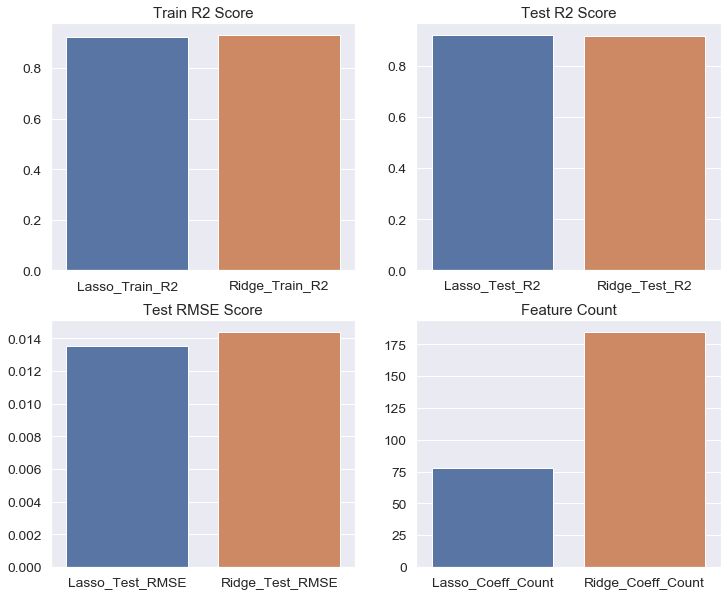

In [72]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))   
plt.subplot(2,2,1)
train_r2 = {'Lasso_Train_R2': [0.922786227946804], 'Ridge_Train_R2':[0.9299166434068226]}
plt.title('Train R2 Score')
plt1=sns.barplot(data=pd.DataFrame.from_dict(train_r2))


plt.subplot(2,2,2)
test_r2 = {'Lasso_Test_R2': [0.9197730226689944], 'Ridge_Test_R2':[0.9143609272434796]}
plt.title('Test R2 Score')
plt2=sns.barplot(data=pd.DataFrame.from_dict(test_r2))

plt.subplot(2,2,3)
test_rmse = {'Lasso_Test_RMSE': [0.013496695690764733], 'Ridge_Test_RMSE':[0.014407180012094439]}
plt.title('Test RMSE Score')
plt2=sns.barplot(data=pd.DataFrame.from_dict(test_rmse))

plt.subplot(2,2,4)
coeff_count = {'Lasso_Coeff_Count': [lasso_coeff_count], 'Ridge_Coeff_Count':[ridge_coeff_count]}
plt.title('Feature Count')
plt2=sns.barplot(data=pd.DataFrame.from_dict(coeff_count))

plt.show()

<b> We can clearly see the advantages of Lasso from above plots </b><br>
<b> Lasso and Ridge have nearly same accuracy but Lasso uses half the amount of features used by Ridge </b>

In [73]:
# Most important Predictor Variables:
from math import exp
lasso_factors = []
for i in range(10):
    print(lasso_coeffs[i][0], 'Impact Factor: ', exp(lasso_coeffs[i][1]))
    lasso_factors.append(lasso_coeffs[i][0])

constant Impact Factor:  157156.90811606066
Condition2_PosN Impact Factor:  0.7232502423798424
Neighborhood_StoneBr Impact Factor:  1.119631932948586
GrLivArea Impact Factor:  1.0822043220703148
Neighborhood_Crawfor Impact Factor:  1.0822043220703148
OverallQual Impact Factor:  1.0768068054962199
Neighborhood_Edwards Impact Factor:  0.9361308642916188
Age Impact Factor:  0.9445940693665233
Neighborhood_NridgHt Impact Factor:  1.0575976837366112
Exterior1st_BrkFace Impact Factor:  1.0575976837366112


<b> Top 10 Variables in order of their highest Impact on Sales Prediction  </b>

# Question and Answers

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

# Answer 1

Optimal Values of alpha for Ridge Regression is 8 <br>
Optimal Values of alpha for Lasso Regression is 0.001

In [74]:
from pdb import set_trace as bp
#double alpha lasso model
alpha = 2*0.001
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train)

model_parameters_2 = list(lasso2.coef_)
model_parameters_2.insert(0, lasso2.intercept_)
model_parameters_2 = [round(x, 3) for x in model_parameters_2]
cols2 = X_train.columns
cols2 = cols2.insert(0, "constant")
lasso_coeffs2 = sorted(list(zip(cols2, model_parameters_2)),key=lambda x: abs(x[1]), reverse=True)

#lets predict the R-squared value of test and train data
y_train_pred = lasso2.predict(X_train)
print('Train R2 for Lasso:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
#lets predict the R-squared value of test and train data
y_test_pred = lasso2.predict(X_test)
print('Test R2 for Lasso:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import mean_squared_error
print ('Test RMSE for Lasso:', mean_squared_error(y_test, y_test_pred))

print('')
#double alpha ridge model
alpha = 2*8
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

model_parameters_2 = list(ridge2.coef_)
model_parameters_2.insert(0, ridge2.intercept_)
model_parameters_2 = [round(x, 3) for x in model_parameters_2]
cols2 = X_train.columns
cols2 = cols2.insert(0, "constant")
ridge_coeffs2 = sorted(list(zip(cols2, model_parameters_2)),key=lambda x: abs(x[1]), reverse=True)

#lets predict the R-squared value of test and train data
y_train_pred = ridge2.predict(X_train)
print('Train R2 for Ridge:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
#lets predict the R-squared value of test and train data
y_test_pred = ridge2.predict(X_test)
print('Test R2 for Ridge:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import mean_squared_error
print ('Test RMSE for Ridge:', mean_squared_error(y_test, y_test_pred))

print('')

lasso_coeff_count2=0
ridge_coeff_count2=0
for i in range(len(lasso_coeffs2)):
    if lasso_coeffs2[i][1] != 0:
        lasso_coeff_count2 +=1
    if ridge_coeffs2[i][1] != 0:
        ridge_coeff_count2 +=1
print('Total Coeffs in Lasso Regression:',lasso_coeff_count2)
print('Total Coeffs in Ridge Regression:',ridge_coeff_count2)


Train R2 for Lasso: 0.9032813071167223
Test R2 for Lasso: 0.9134095625462776
Test RMSE for Lasso: 0.014567229414879417

Train R2 for Ridge: 0.9248152983046
Test R2 for Ridge: 0.9142637342004593
Test RMSE for Ridge: 0.014423530932552189

Total Coeffs in Lasso Regression: 59
Total Coeffs in Ridge Regression: 185


<b> Generally increasing alpha value will make the model simple and underfit the model, but doubling the alpha value increased did not change the accuracy significantly (although slightly decreasing the accuracy) but decreased the Independant Variables significantly for Lasso Regression from 78 to 59</b>
<br><br>
<b> No Significant Difference in terms of Accuracy or Independant Variables for Ridge Regression </b>

In [75]:
# Top 10 Most important Predictor Variables:
from math import exp
lasso2_factors = []
for i in range(10):
    print(lasso_coeffs2[i][0], 'Impact Factor: ', exp(lasso_coeffs2[i][1]))
    lasso2_factors.append(lasso_coeffs2[i][0])

print('')
def Intersection(lst1, lst2): 
    return set(lst1).intersection(lst2) 

print('Unchanged Significant Dependant Variables:',Intersection(lasso_factors, lasso2_factors)) 
print()
list_difference = [item for item in lasso_factors if item not in lasso2_factors]

print('Changed Significant Dependant Variables:',list_difference) 

constant Impact Factor:  166541.53221005326
OverallQual Impact Factor:  1.0843708965667604
GrLivArea Impact Factor:  1.0757305369147034
Neighborhood_Edwards Impact Factor:  0.9474321065017983
Age Impact Factor:  0.951229424500714
OverallCond Impact Factor:  1.0408107741923882
MSZoning_RM Impact Factor:  0.9607894391523232
TotalBsmtSF Impact Factor:  1.0356197087996233
SaleCondition_Partial Impact Factor:  1.0356197087996233
Neighborhood_Crawfor Impact Factor:  1.028395684421425

Unchanged Significant Dependant Variables: {'constant', 'Age', 'GrLivArea', 'Neighborhood_Crawfor', 'OverallQual', 'Neighborhood_Edwards'}

Changed Significant Dependant Variables: ['Condition2_PosN', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Exterior1st_BrkFace']


<b> Here are the Important Predictors after doubling the lambda Value </b> <br>
<b> 6/10 predictors did not change when compared to previous model </b> 

## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

## Answer 2

<b>I will choose Lasso Regression as it is on par with Ridge Regression Accuracy with lesser Predictor Variables. Lasso eliminates the non significant predictors by making their coefficient as 0</b><br><br>

Lasso alpha = 0.001 and Ridge alpha = 8

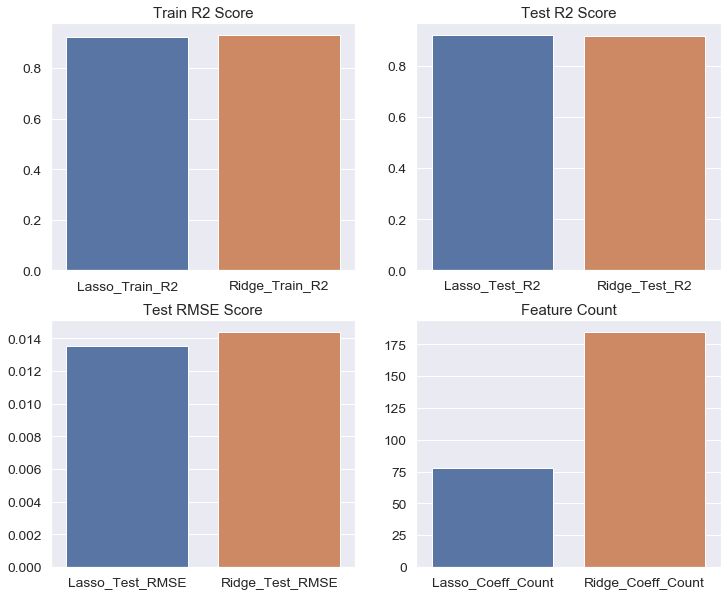

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))   
plt.subplot(2,2,1)
train_r2 = {'Lasso_Train_R2': [0.922786227946804], 'Ridge_Train_R2':[0.9299166434068226]}
plt.title('Train R2 Score')
plt1=sns.barplot(data=pd.DataFrame.from_dict(train_r2))


plt.subplot(2,2,2)
test_r2 = {'Lasso_Test_R2': [0.9197730226689944], 'Ridge_Test_R2':[0.9143609272434796]}
plt.title('Test R2 Score')
plt2=sns.barplot(data=pd.DataFrame.from_dict(test_r2))

plt.subplot(2,2,3)
test_rmse = {'Lasso_Test_RMSE': [0.013496695690764733], 'Ridge_Test_RMSE':[0.014407180012094439]}
plt.title('Test RMSE Score')
plt2=sns.barplot(data=pd.DataFrame.from_dict(test_rmse))

plt.subplot(2,2,4)
coeff_count = {'Lasso_Coeff_Count': [78], 'Ridge_Coeff_Count':[185]}
plt.title('Feature Count')
plt2=sns.barplot(data=pd.DataFrame.from_dict(coeff_count))

plt.show()

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Answer 3


<b>Previous Top 5 Predictors</b>

In [77]:
cols_to_remove = []
for i in range(1,6):
    print(lasso_coeffs[i][0], 'with Impact Factor: ', exp(lasso_coeffs[i][1]))
    cols_to_remove.append(lasso_coeffs[i][0])

Condition2_PosN with Impact Factor:  0.7232502423798424
Neighborhood_StoneBr with Impact Factor:  1.119631932948586
GrLivArea with Impact Factor:  1.0822043220703148
Neighborhood_Crawfor with Impact Factor:  1.0822043220703148
OverallQual with Impact Factor:  1.0768068054962199


In [78]:
X_train_sliced = X_train.drop(cols_to_remove, axis=1)
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_3.fit(X_train_sliced, y_train)
# cv results
cv_results_3 = pd.DataFrame(model_cv_3.cv_results_)
#checking the value of optimum number of parameters
print(model_cv_3.best_params_)

lasso3 = Lasso(alpha=model_cv_3.best_params_['alpha'])
lasso3.fit(X_train_sliced, y_train)

model_parameters_3 = list(lasso3.coef_)
model_parameters_3.insert(0, lasso3.intercept_)
model_parameters_3 = [round(x, 3) for x in model_parameters_3]
cols3 = X_train_sliced.columns
cols3 = cols3.insert(0, "constant")
lasso_coeffs3 = sorted(list(zip(cols3, model_parameters_3)),key=lambda x: abs(x[1]), reverse=True)
for i in range(1,6):
    print(lasso_coeffs3[i][0], 'with Impact Factor: ', exp(lasso_coeffs3[i][1]))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.0001}
Condition2_PosA with Impact Factor:  1.8330843770260485
MSZoning_FV with Impact Factor:  1.5936069993484847
MSZoning_RL with Impact Factor:  1.499302500056767
MSZoning_RH with Impact Factor:  1.4978039469581388
Condition2_Norm with Impact Factor:  1.4710846708147431


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.1s finished


<b> These are the New Top 5 Predictor Variables, We can Clearly see that the Coefficients are increased compared to Previous Model as Model became more complex now. </b>

## Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

## Answer 4

- We have seen that the data is skewed so, rather than predicting the model on the dependant variable, we created the model on the log of the dependant variable so that the created model becomes robust to outliers
- Model is more generalisable due to fewer predictor variables. With alpha_Lasso=0.001 we have 78 variables and with alpha_lasso=0.002 we have 59 Predictor Variables. We can increase the cut down more predictor variables too depending on the accuracy we are targeting. So, due to this reason, model is more generalisable.

- Implications: Accuracy Slighly decrease as we move towards generalisation as we cut down predictor variables.
- Implications: Model Robustness can decrease the difference of accuracy on train and test dataset. This can be achieved by doing outlier treatment at preprocessing.
